In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
table = pd.read_csv('Round_2_results.csv', delimiter = ',')

In [9]:
# Reorder columns for more clarity
#
# Scenario, Memory Limit, CPU Limit, and RPS are inputs
# Mean Latency, Working Set and CPU Utilization are outputs (things that were measured)
#
# The rest of the columns are here for validation/context
cols = table.columns.tolist()
cols
table = table[[
    'Scenario', 
    'Memory Limit (MB)', 
    'CPU Limit',
    'RPS',
    'Mean Latency (ms)',
    'Working Set (MB)', 
    'CPU Utilization %', 
    'Max CPU Utilization %',
    'Bad Responses',
    'Completed Requests',
    'Completed Requests (%)']]

In [78]:
# define our parameters
scenarios = table['Scenario'].unique()
rpses = table['RPS'].unique()
rpses.sort()

In [79]:
# exclude results that don't meet our thresholds for "working well"
#
# this is defined right now as completing > 70% of the expected amount of throughput
# with a latency of less than 100ms
unfiltered = table
table = table[(table['Completed Requests (%)'] >= 60) & (table['Mean Latency (ms)'] <= 100)]

In [80]:
def make_plot(df, metric, rps):
    fig, ax = plt.subplots()
    ax.set_title(f'{metric} by CPU Limit and Memory Limit with RPS == {rps}')
    ax.set_ylabel(f'{metric}')
    
    width = 0.60
    
    by_combination = df.groupby(['CPU Limit', 'Memory Limit (MB)'])
    x_pos = np.arange(len(by_combination.groups))

    for i, scenario in enumerate(scenarios):
        x_values = []
        for keys, frame in by_combination:
            memory_limit = keys[1]
            cpu_limit = keys[0]
            filtered = frame[(frame['RPS'] == rps)  & (frame['Scenario'] == scenario)]
            value = filtered[metric].values[0] if filtered.values.any() else 0
            x_values.append(value)
    
        offset = i * (width / scenarios.size)
        ax.bar(np.subtract(x_pos, offset), x_values, width / scenarios.size, align='edge', label=scenario)

    x_labels = []
    for keys, frame in by_combination:
        x_labels.append(f'{keys[1]}MB x {keys[0]} CPU')

    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels)
    ax.legend()
    fig.set_size_inches(16, 8)

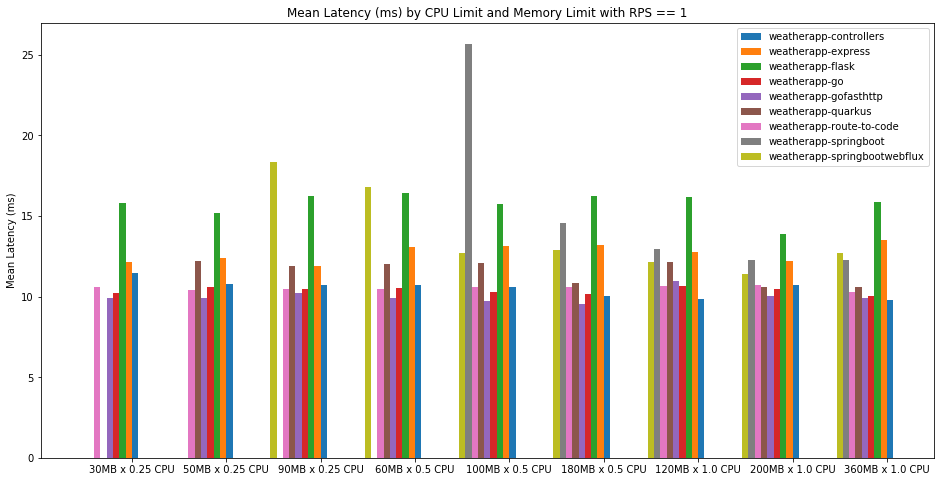

In [81]:
make_plot(table, 'Mean Latency (ms)', 1)

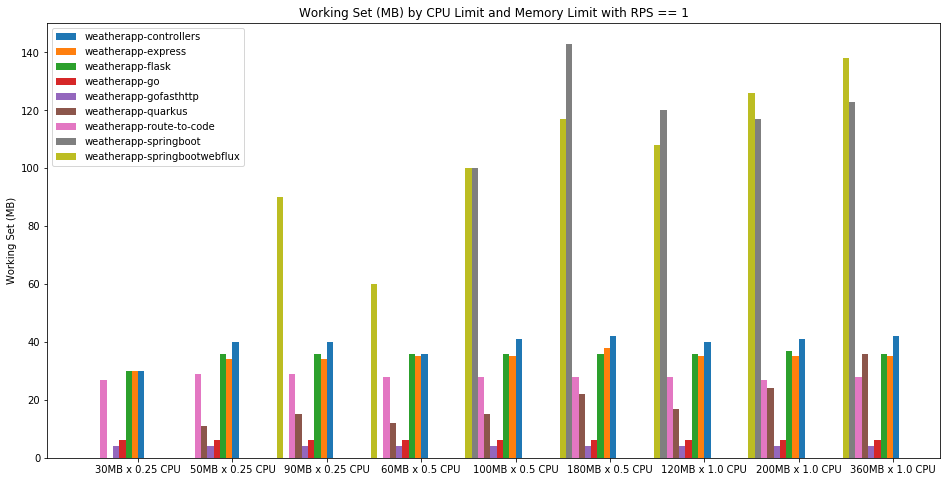

In [82]:
make_plot(table, 'Working Set (MB)', 1)

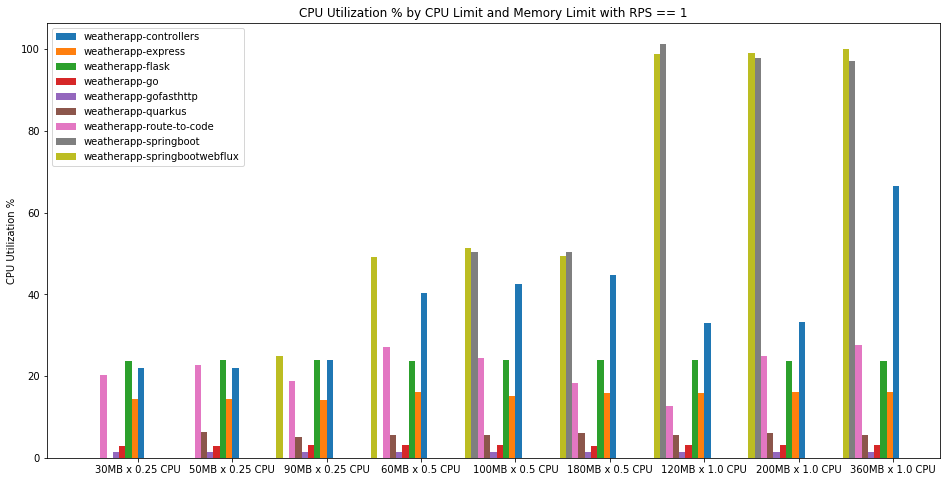

In [83]:
make_plot(table, 'CPU Utilization %', 1)

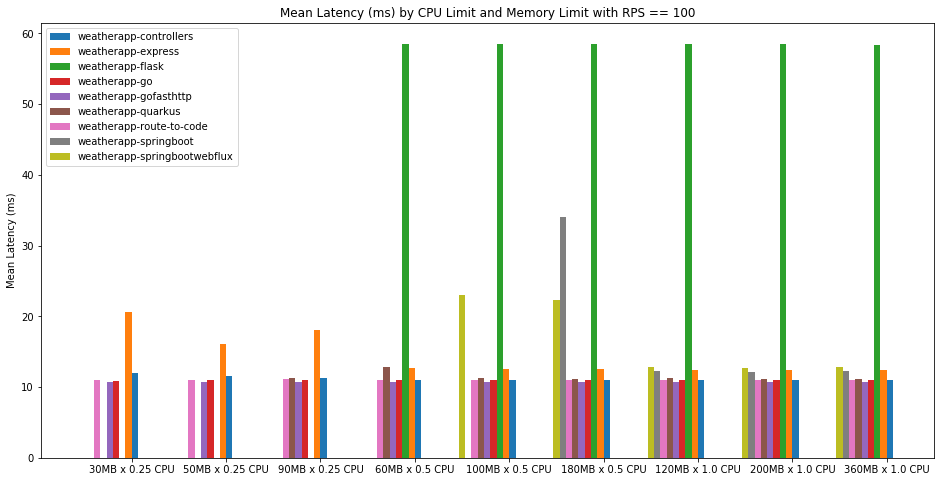

In [84]:
make_plot(table, 'Mean Latency (ms)', 100)

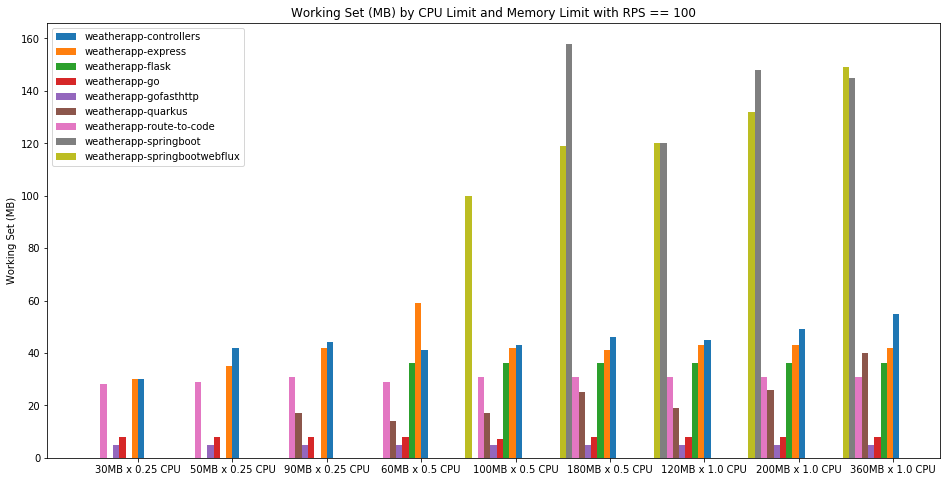

In [85]:
make_plot(table, 'Working Set (MB)', 100)

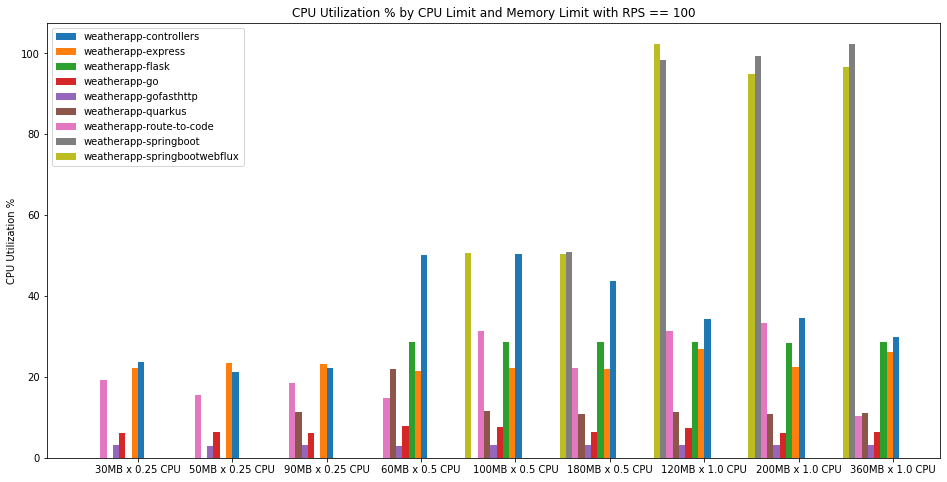

In [86]:
make_plot(table, 'CPU Utilization %', 100)

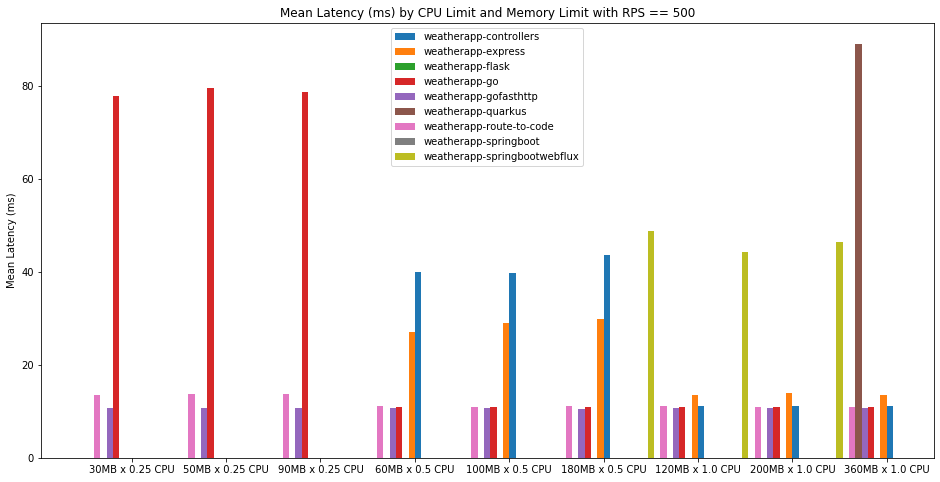

In [87]:
make_plot(table, 'Mean Latency (ms)', 500)

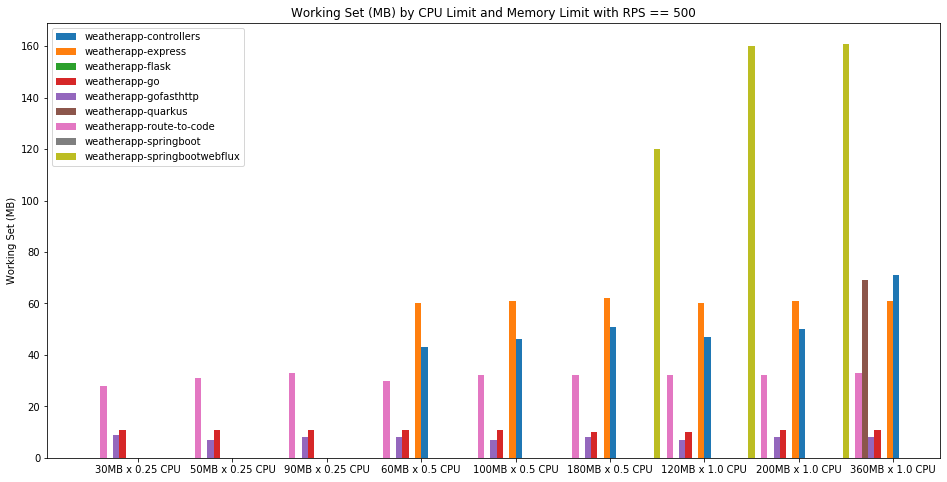

In [88]:
make_plot(table, 'Working Set (MB)', 500)

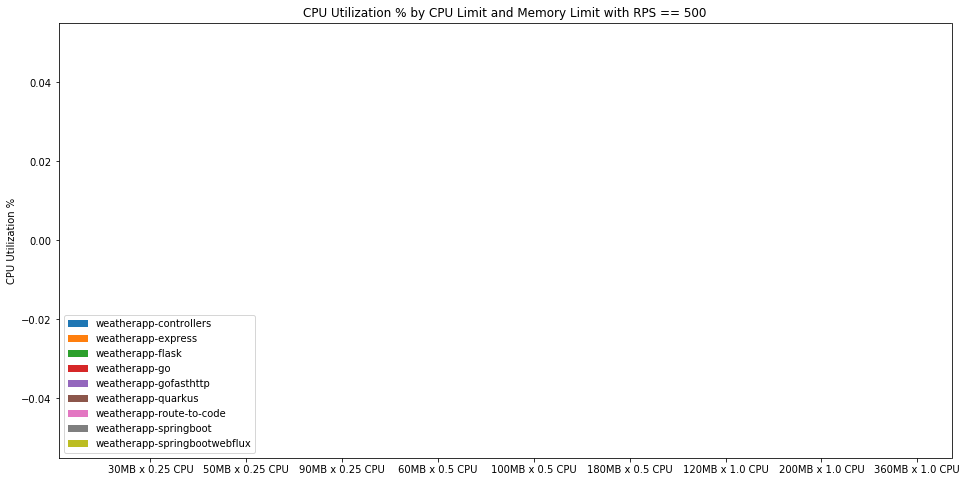

In [89]:
make_plot(table, 'CPU Utilization %', 500)

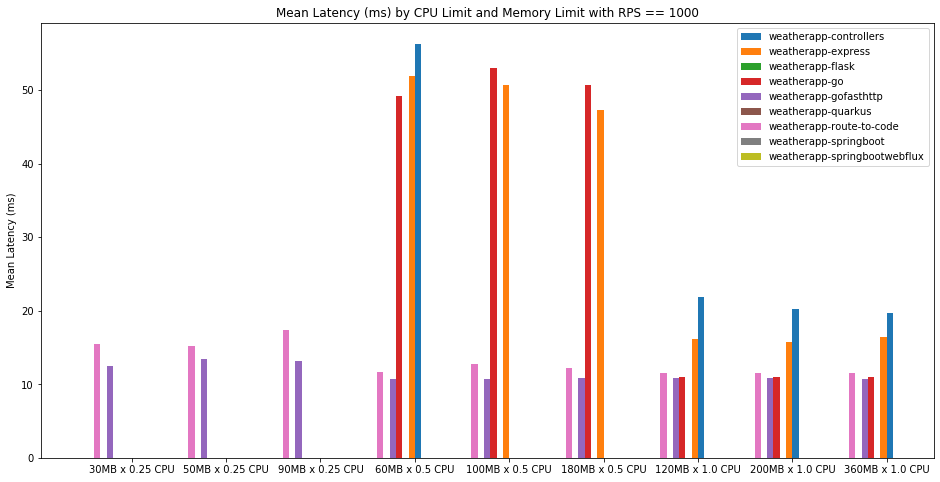

In [90]:
make_plot(table, 'Mean Latency (ms)', 1000)

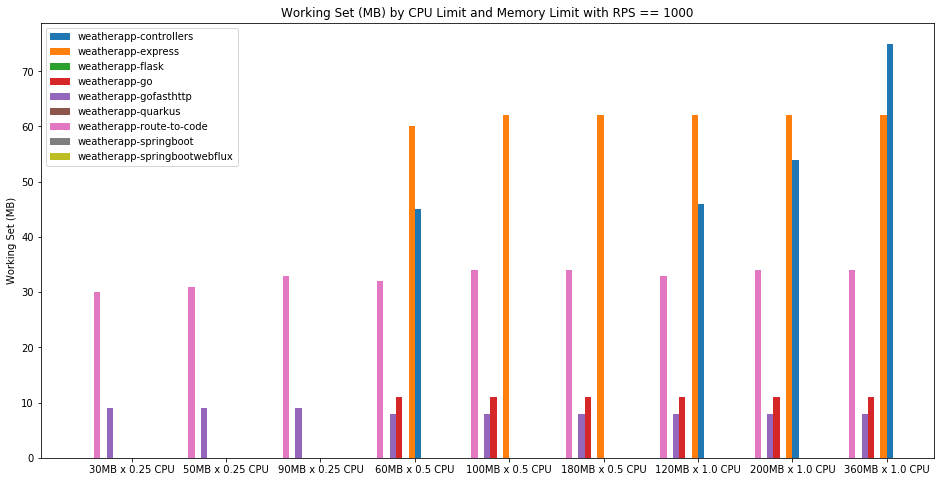

In [91]:
make_plot(table, 'Working Set (MB)', 1000)

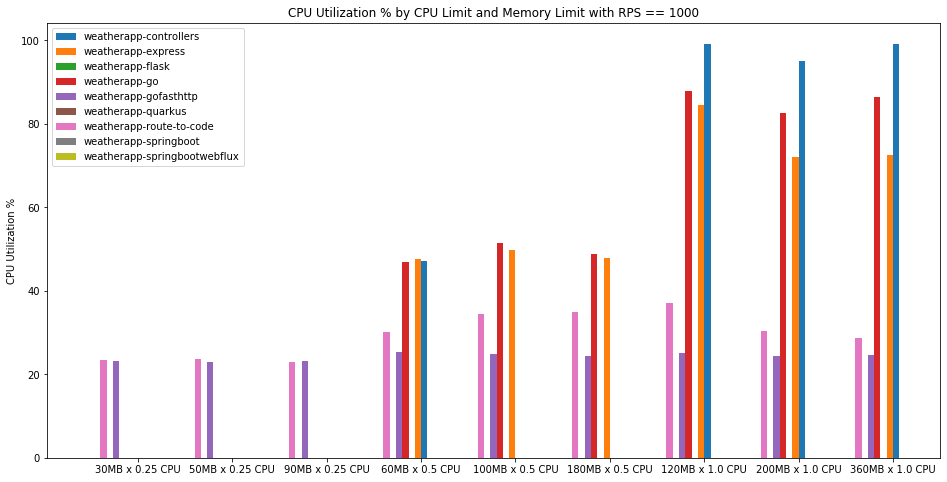

In [92]:
make_plot(table, 'CPU Utilization %', 1000)

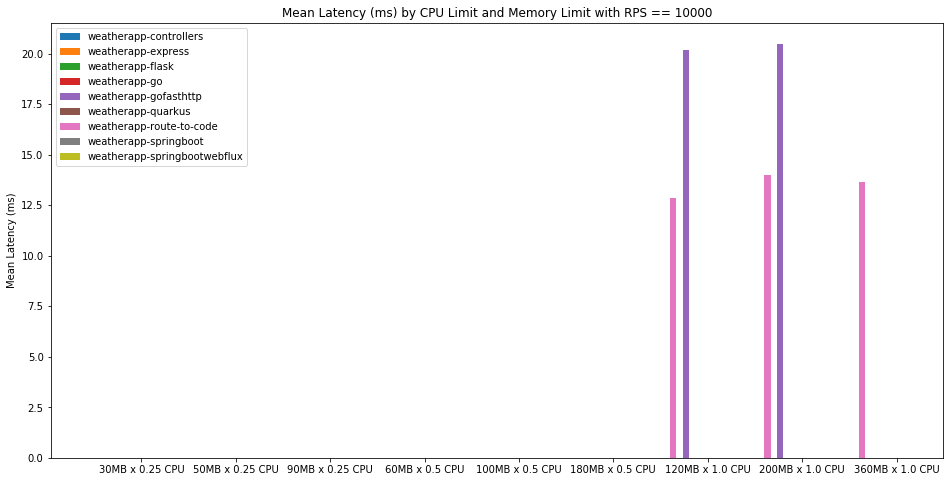

In [93]:
make_plot(table, 'Mean Latency (ms)', 10000)

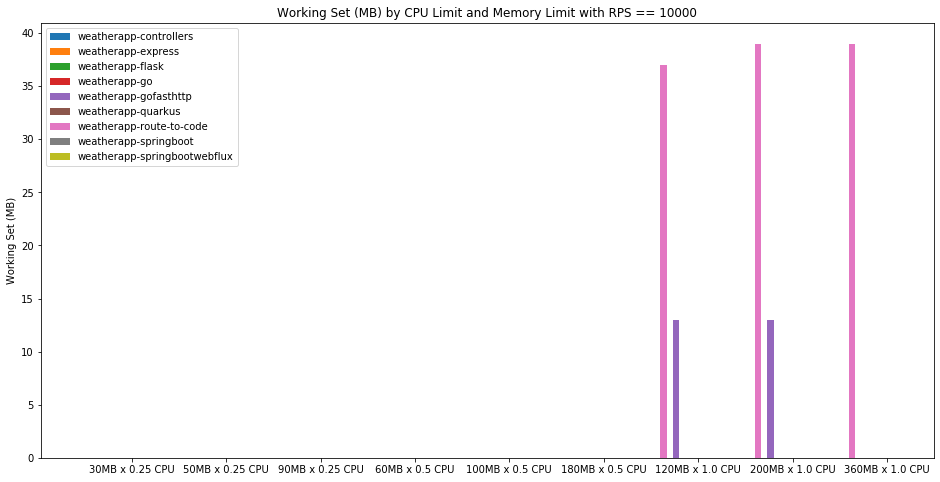

In [94]:
make_plot(table, 'Working Set (MB)', 10000)

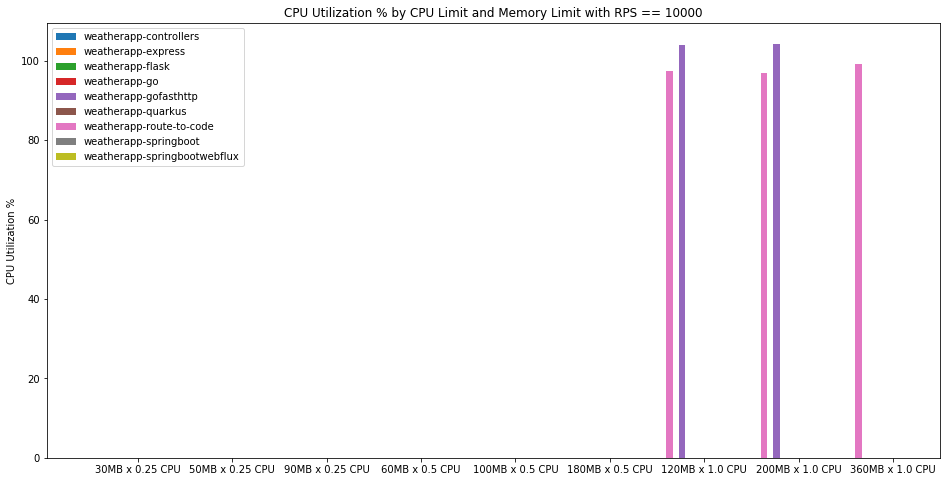

In [95]:
make_plot(table, 'CPU Utilization %', 10000)

In [96]:
def make_heatmap(df, scenario):
    memory_limits = df['Memory Limit (MB)'].unique()
    cpu_limits = df['CPU Limit'].unique()
    
    by_combination = df.groupby(['CPU Limit', 'Memory Limit (MB)'])

    results = np.zeros((rpses.size, len(by_combination)), dtype=float)
    
    for i, rps in enumerate(rpses):
        j = 0
        for keys, frame in by_combination:
            cpu_limit = keys[0]
            memory_limit = keys[1]
            filtered = frame[
                (frame['Scenario'] == scenario) &
                (frame['RPS'] == rps) & 
                (frame['Memory Limit (MB)'] == memory_limit) & 
                (frame['CPU Limit'] == cpu_limit)]
            value = filtered['Completed Requests (%)'].values[0] if filtered.values.any() else 0
            results[i, j] = min(value, 100)
            j += 1
                
    fig, ax = plt.subplots()
    ax.set_title(f'Heatmap of completed request % for {scenario}')
    ax.set_xlabel('CPU Limit x Memory Limit (MB)')
    ax.set_ylabel('RPS')
    x_pos = np.arange(cpu_limits.size * memory_limits.size)
    x_labels = []
    for keys, frame in by_combination:
        x_labels.append(f'{keys[1]}MB x {keys[0]} CPU')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels)
    
    y_pos = np.arange(rpses.size)
    y_labels = rpses
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_labels)
    
    fig.set_size_inches(16, 10)
    ax.imshow(results, interpolation=None, cmap='RdYlGn', vmax=100, vmin=0)

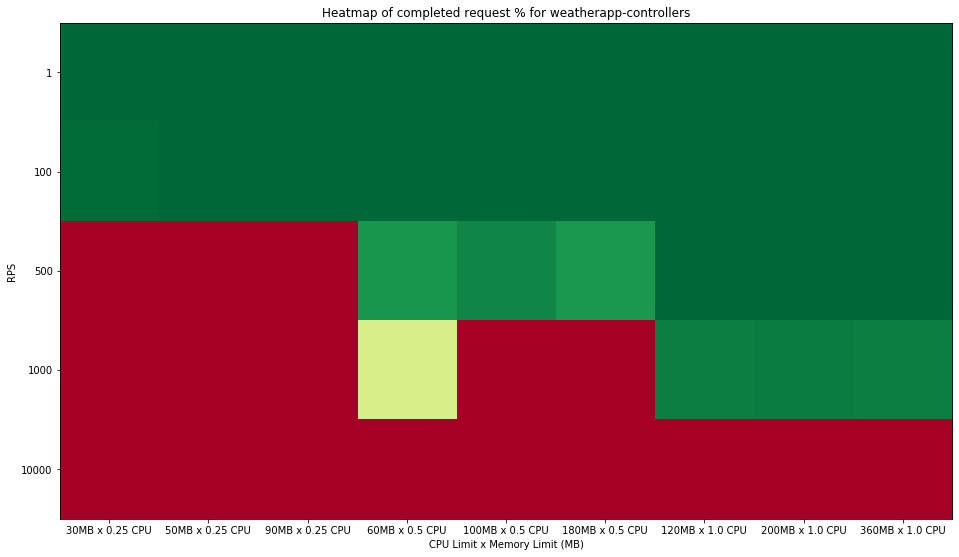

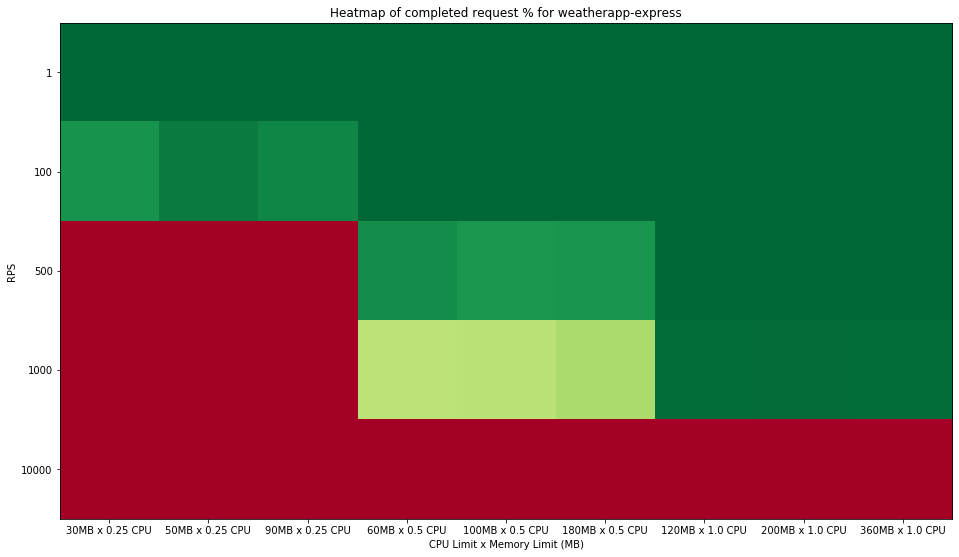

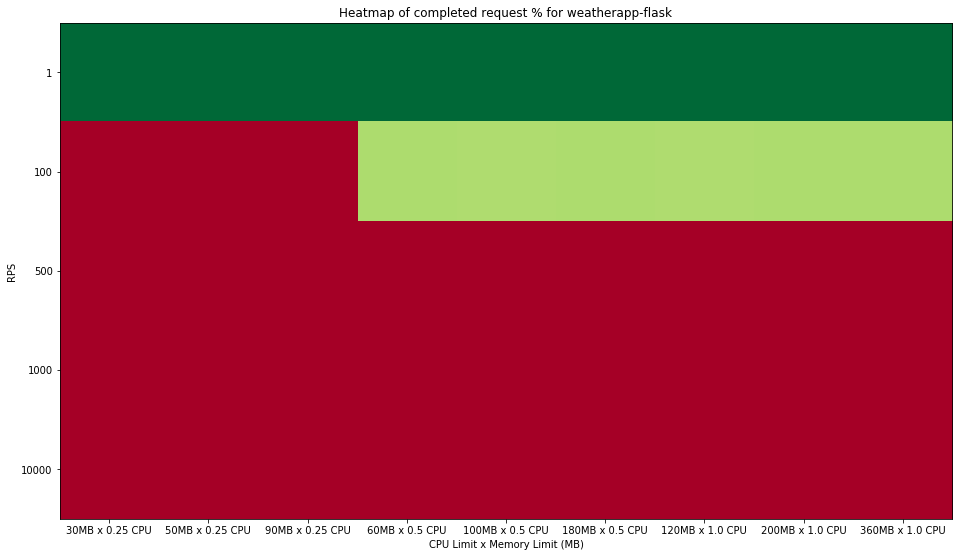

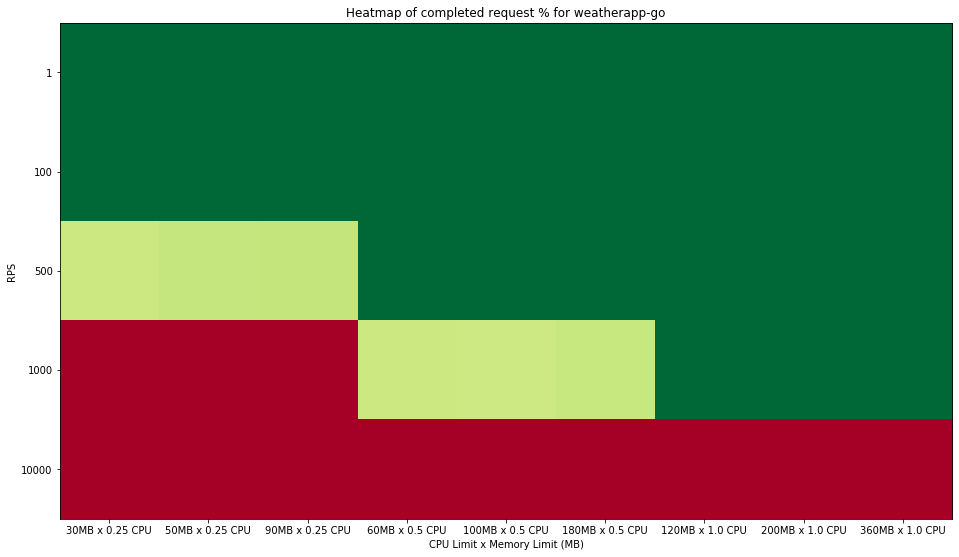

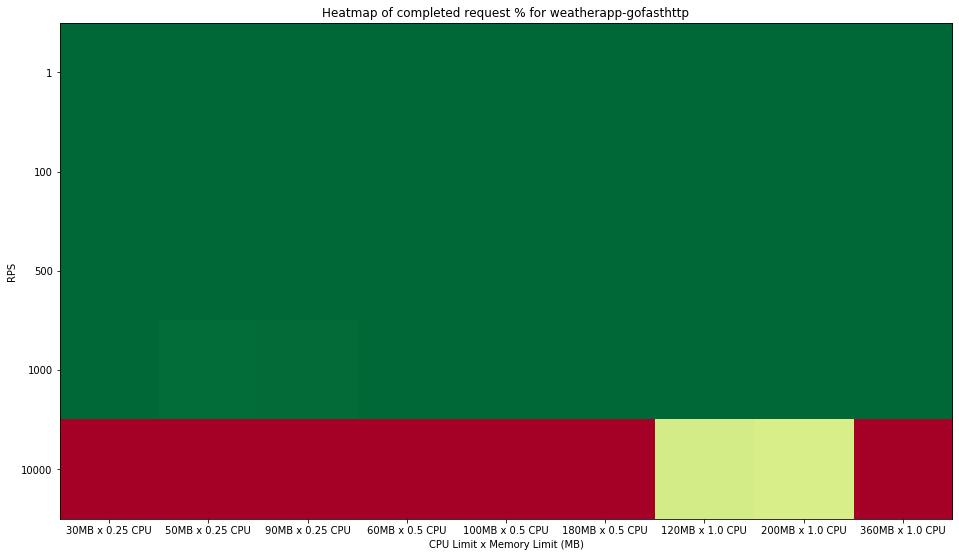

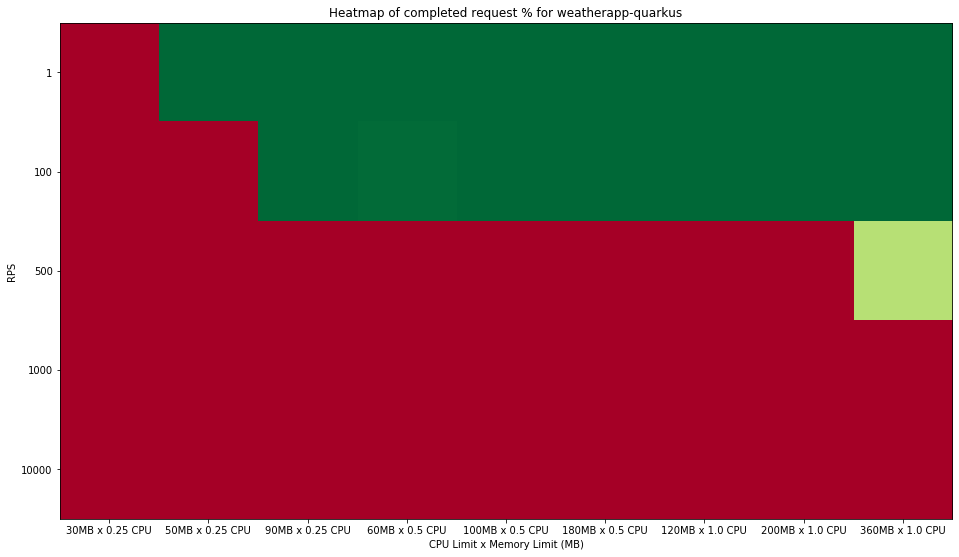

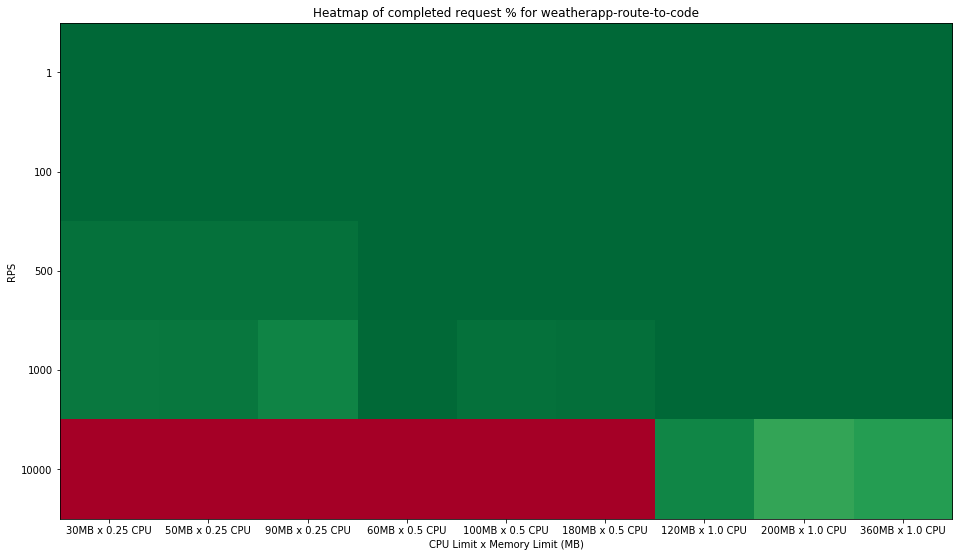

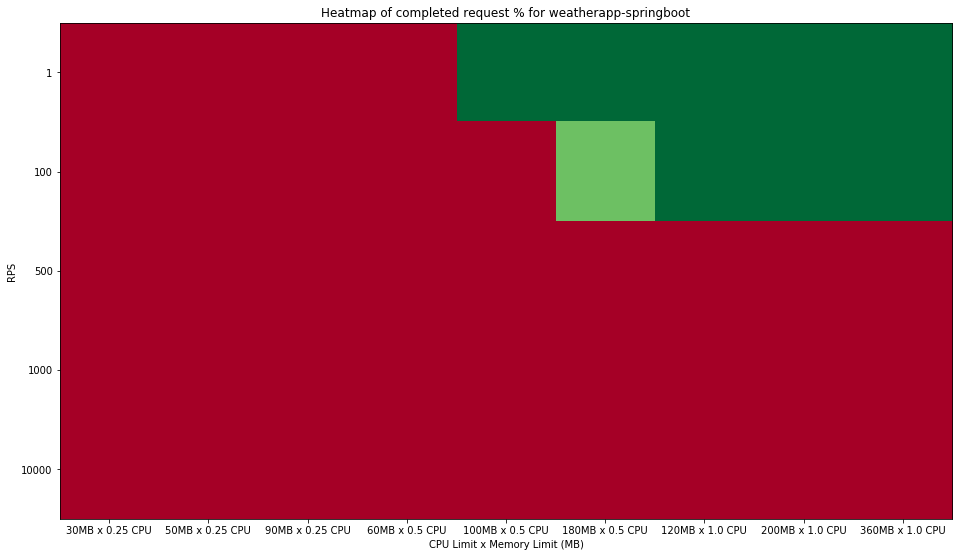

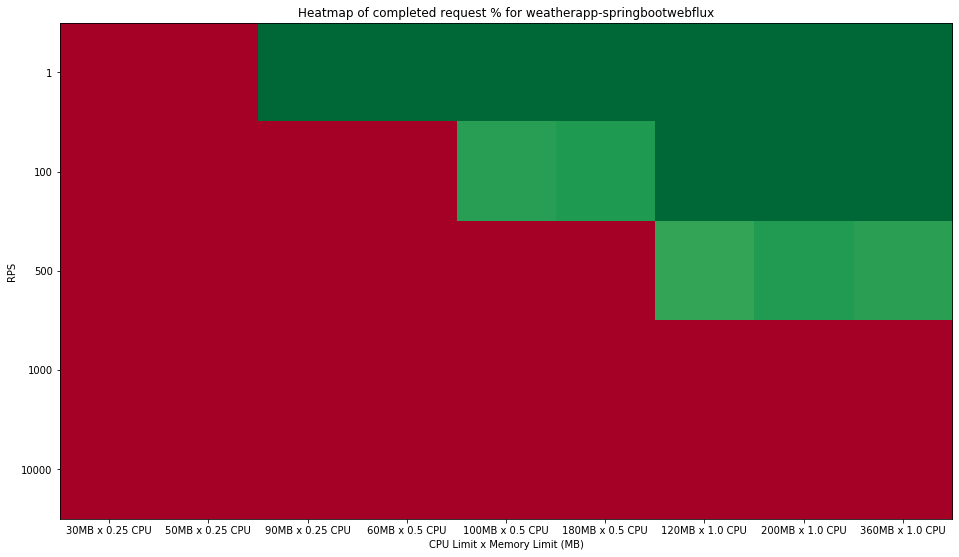

In [97]:
for scenario in scenarios:
    make_heatmap(unfiltered, scenario)